<font> Imports for this code </font>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from IPython.display import HTML, display
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<font>Functions for the project are in the sections below.</font>

In [3]:
def taxifileReader(filename,sortCol,startDate,endDate):
    '''
    Reads in the taxi cab csv files into dataframes. Will also convert dates into pandas
    datetime objects and sorts the data on a given column.
    '''
    temp = pd.read_csv(filename)
    temp[startDate]=pd.to_datetime(temp[startDate],format='%d%b%y:%X')
    temp[endDate]=pd.to_datetime(temp[endDate],format='%d%b%y:%X')
    temp = temp.sort_values(sortCol)
    return temp

In [4]:
def fileReader(filename,sortCol,date):
    '''
    Reads in the csv files for bus and train data into dataframes. Will also convert dates into pandas
    datetime objects and sorts the data on a given column.
    '''
    temp = pd.read_csv(filename)
    temp[date]=pd.to_datetime(temp[date],format='%m/%d/%Y')
    temp=temp[(pd.DatetimeIndex(temp[date]).year == 2013) | (pd.DatetimeIndex(temp[date]).year == 2014) |
                  (pd.DatetimeIndex(temp[date]).year == 2015) | (pd.DatetimeIndex(temp[date]).year == 2016) | 
                  (pd.DatetimeIndex(temp[date]).year == 2017)]
    temp = temp.sort_values(sortCol)
    return temp

In [50]:
def getDistance(slat,slon,elat,elon):
    tplat, tplong, tdlat, tdlong = math.radians(slat),math.radians(slon),math.radians(elat),math.radians(elon)
    dlat = tdlat - tplat
    dlong = tdlong - tplong
    a = math.sin(dlat/2)**2 + math.cos(tplat) * math.cos(tdlat) * math.sin(dlong/2)**2
    c = 2 * math.asin(math.sqrt(a))
    mi = 3963.1676*c
    
    return mi

In [78]:
def mapMaker(year,month,*args):
    '''
    Generates a folium map centered over Chicago. Plots taxi cab data from the starting location of each trip 
    for a given month and a year. The dataframes are given as arguments, and the color is changed for each
    dataframe provided.
    '''
    folium_map = folium.Map(location=[41.878113, -87.629799],
                        zoom_start=13,
                        tiles='Stamen Toner')
    
    colorList = ['Blue','Yellow','Green','Red','Pink']
    colorCount=0
    
    for entry in args:
        lat = list(entry['pickup_lat'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                              (pd.DatetimeIndex(entry['trip_start']).month == month)])
        long = list(entry['pickup_long'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                                (pd.DatetimeIndex(entry['trip_start']).month == month)])
        dolat = list(entry['dropoff_lat'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                              (pd.DatetimeIndex(entry['trip_start']).month == month)])
        dolong = list(entry['dropoff_long'][(pd.DatetimeIndex(entry['trip_start']).year == year) & 
                                (pd.DatetimeIndex(entry['trip_start']).month == month)])
        
        length=len(lat)
        pos=0


        while pos < length:
            if not math.isnan(lat[pos]) and not math.isnan(long[pos]):
                if not math.isnan(dolat[pos]) and not math.isnan(dolong[pos]):
                    distance = getDistance(lat[pos],long[pos],dolat[pos],dolong[pos])
                    marker = folium.CircleMarker(location=[lat[pos], long[pos]],
                                             color=colorList[colorCount],radius=distance*2,fill=True)
                else:
                    marker = folium.CircleMarker(location=[lat[pos], long[pos]],
                                             color=colorList[colorCount],fill=True)
                marker.add_to(folium_map)
            pos+=1
        colorCount += 1
    return folium_map

In [70]:
def countOccurences(season,dateCol,*args):
    
    '''
    Counts the number of trips that happened in each taxi dataframe provided over a certain season. Seasons 
    are defined as:
    Spring: March, April, May
    Summer: June, July August
    Fall: September, October, November
    Winter: December, January, February
    '''
    
    if season.lower() == 'spring': months=[3,4,5]
    elif season.lower() =='summer': months=[6,7,8]
    elif season.lower() == 'fall': months=[9,10,11]
    elif season.lower() == 'winter': months=[12,1,2]
    
    occurences=[]
    
    for df in args:
        totalOccurences=0
        
        for month in months:
            totalOccurences+=df[dateCol][(pd.DatetimeIndex(df[dateCol]).month == month)].count()
            
        occurences.append(totalOccurences/5)
    
    occurences.append(sum(occurences))
        
    return occurences
        

In [71]:
def countBTOccurences(season,dateCol,numrider,*args):
    
    '''
    Counts the number of trips that happened in each dataframe provided over a certain season. Seasons 
    are defined as:
    Spring: March, April, May
    Summer: June, July August
    Fall: September, October, November
    Winter: December, January, February
    '''
    
    if season.lower() == 'spring': months=[3,4,5]
    elif season.lower() =='summer': months=[6,7,8]
    elif season.lower() == 'fall': months=[9,10,11]
    elif season.lower() == 'winter': months=[12,1,2]
    
    occurences=[]
    
    for df in args:
        totalOccurences=0
        
        for month in months:
            totalOccurences+=df[numrider][(pd.DatetimeIndex(df[dateCol]).month == month)].sum()
            
        occurences.append(totalOccurences/5)
    
    occurences.append(sum(occurences))
        
    return occurences

In [72]:
def sumstat(dateCol,colName,mean=True,mx=True,mn=True,*args):
    
    '''
    Returns summary statistics (mean, max, min) for each dataframe provided. These are broken up by year.
    '''
    
    result=[]
    for entry in args:
        result.append(entry['company'].head(1))
        if mean:
            result.append('mean')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).mean())
        if mx:
            result.append('max')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).max())
        if mn:
            result.append('min')
            result.append(entry[colName].groupby(pd.DatetimeIndex(entry[dateCol]).year).min()) 
    return result

<font> CSV Imports using functions defined above</font>

In [73]:
NWCab = taxifileReader('N&W Cab Co.csv','trip_start','trip_start','trip_end')
BennyJona = taxifileReader('Benny Jona.csv','trip_start','trip_start','trip_end')
CDCab=taxifileReader('C&D Cab Inc.csv','trip_start','trip_start','trip_end')
Zeymane=taxifileReader('Zeymane Corp.csv','trip_start','trip_start','trip_end')
train = fileReader('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv','date','date')
bus = fileReader('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv','date','date')

Adds a numerical representation of the day

In [74]:
NWCab['weekday']=NWCab['trip_start'].dt.weekday
CDCab['weekday']=CDCab['trip_start'].dt.weekday
BennyJona['weekday']=BennyJona['trip_start'].dt.weekday
Zeymane['weekday']=Zeymane['trip_start'].dt.weekday
bus['weekday']=bus['date'].dt.weekday
train['weekday']=train['date'].dt.weekday

In [92]:
new_Zeymane = Zeymane[(Zeymane['fare'] != 0) & (Zeymane['trip_miles'] != 0)]
new_NWCab = NWCab[(NWCab['fare'] != 0) & (NWCab['trip_miles'] != 0)]
new_CDCab = CDCab[(CDCab['fare'] != 0) & (CDCab['trip_miles'] != 0)]
new_BennyJona = BennyJona[(BennyJona['fare'] != 0) & (BennyJona['trip_miles'] != 0)]

Creates a dataframe containing the total number of trips that occurred on each day of the week

In [75]:
NWCabday=[]
CDCabday=[]
BennyJonaday=[]
Zeymaneday=[]
busday=[]
trainday=[]
for i in range(7):
    NWCabday.append(NWCab['trip_start'][(NWCab['weekday']==i)].count())
    CDCabday.append(CDCab['trip_start'][(CDCab['weekday']==i)].count())
    BennyJonaday.append(BennyJona['trip_start'][(BennyJona['weekday']==i)].count())
    Zeymaneday.append(Zeymane['trip_start'][(Zeymane['weekday']==i)].count())
    busday.append(bus['rides'][(bus['weekday'] == i)].sum())
    trainday.append(train['rides'][(train['weekday'] == i)].sum())

day_totals=pd.DataFrame({'NWCab':NWCabday,'CDCab':CDCabday,'BennyJona':BennyJonaday,'Zeymane':Zeymaneday,'Bus':busday,'Train':trainday})
day_totals


,NWCab,CDCab,BennyJona,Zeymane,Bus,Train
0,2912,3214,2283,2896,212012839,149378427
1,3055,4351,2483,2948,225904403,159903212
2,3217,4480,2555,1974,225646852,160791931
3,3321,4757,2329,3003,221861436,160380936
4,3496,5567,2567,3093,221841695,160594687
5,3534,3835,1952,1710,139372379,98242705
6,4134,3108,1709,1775,101936272,74504266


In [94]:
NWCabday=[]
CDCabday=[]
BennyJonaday=[]
Zeymaneday=[]
busday=[]
trainday=[]
for i in range(7):
    NWCabday.append(new_NWCab['trip_start'][(new_NWCab['weekday']==i)].count())
    CDCabday.append(new_CDCab['trip_start'][(new_CDCab['weekday']==i)].count())
    BennyJonaday.append(new_BennyJona['trip_start'][(new_BennyJona['weekday']==i)].count())
    Zeymaneday.append(new_Zeymane['trip_start'][(new_Zeymane['weekday']==i)].count())
    busday.append(bus['rides'][(bus['weekday'] == i)].sum())
    trainday.append(train['rides'][(train['weekday'] == i)].sum())

day_totals=pd.DataFrame({'NWCab':NWCabday,'CDCab':CDCabday,'BennyJona':BennyJonaday,'Zeymane':Zeymaneday,'Bus':busday,'Train':trainday})
day_totals


,NWCab,CDCab,BennyJona,Zeymane,Bus,Train
0,2771,3111,2111,2293,212012839,149378427
1,2890,4194,2348,2408,225904403,159903212
2,3041,4324,2337,1636,225646852,160791931
3,3113,4579,2195,2383,221861436,160380936
4,3296,5404,2422,2495,221841695,160594687
5,3330,3729,1798,1373,139372379,98242705
6,3912,3017,1597,1404,101936272,74504266


<font>Graph displaying the density of taxi pickups for the 4 companies chosen in Chicago</font>

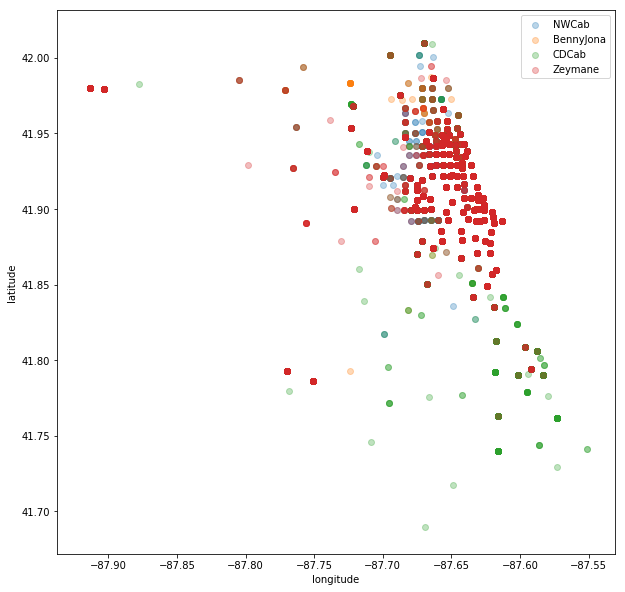

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(new_NWCab['pickup_long'], new_NWCab['pickup_lat'],alpha=0.3)
plt.scatter(new_BennyJona['pickup_long'],new_BennyJona['pickup_lat'],alpha=0.3)
plt.scatter(new_CDCab['pickup_long'],new_CDCab['pickup_lat'],alpha=0.3)
plt.scatter(new_Zeymane['pickup_long'],new_Zeymane['pickup_lat'],alpha=0.3)
legend=ax.legend(['NWCab','BennyJona','CDCab','Zeymane'])
plt.xlabel('longitude');
plt.ylabel('latitude');

<font>Map displaying taxi pick ups for June of 2013, can be adjusted in the code below. </font>

In [91]:
mapMaker(2013,8,new_NWCab,new_CDCab,new_BennyJona,new_Zeymane)

<font>Counts of the number of taxi rides given in the seasons of years 2013-2017 for taxis, buses and trains.</font>

In [14]:
winter=countOccurences('winter','trip_start',NWCab,BennyJona,CDCab,Zeymane)
fall=countOccurences('fall','trip_start',NWCab,BennyJona,CDCab,Zeymane)
summer=countOccurences('summer','trip_start',NWCab,BennyJona,CDCab,Zeymane)
spring=countOccurences('spring','trip_start',NWCab,BennyJona,CDCab,Zeymane)
season_cab_avg=pd.DataFrame(data=[winter,fall,summer,spring],columns=['NWCab','BennyJona','CDCab','Zeymane','combined_total'])
season_cab_avg

,NWCab,BennyJona,CDCab,Zeymane,combined_total
0,981.4,594.4,1102.6,781.2,3459.6
1,1169.6,692.8,2020.6,872.2,4755.2
2,1196.6,942.0,1653.6,873.8,4666.0
3,1386.2,946.4,1085.6,952.6,4370.8


In [95]:
winter=countOccurences('winter','trip_start',new_NWCab,new_BennyJona,new_CDCab,new_Zeymane)
fall=countOccurences('fall','trip_start',new_NWCab,new_BennyJona,new_CDCab,new_Zeymane)
summer=countOccurences('summer','trip_start',new_NWCab,new_BennyJona,new_CDCab,new_Zeymane)
spring=countOccurences('spring','trip_start',new_NWCab,new_BennyJona,new_CDCab,new_Zeymane)
new_season_cab_avg=pd.DataFrame(data=[winter,fall,summer,spring],columns=['NWCab','BennyJona','CDCab','Zeymane','combined_total'])
new_season_cab_avg

,NWCab,BennyJona,CDCab,Zeymane,combined_total
0,966.2,563.2,1075.6,698.6,3303.6
1,1129.8,665.2,1969.0,669.2,4433.2
2,1106.4,879.8,1567.8,690.6,4244.6
3,1268.2,853.4,1059.2,740.0,3920.8


In [60]:
winter=countBTOccurences('winter','date','rides',bus,train)
fall=countBTOccurences('fall','date','rides',bus,train)
summer=countBTOccurences('summer','date','rides',bus,train)
spring=countBTOccurences('spring','date','rides',bus,train)
season_bt_avg=pd.DataFrame(data=[winter,fall,summer,spring],columns=['bus','train','combined_total'])
season_bt_avg

,bus,train,combined_total
0,63079636.4,43446105.0,106525741.4
1,69627881.6,50650502.8,120278384.4
2,66703475.8,50097233.6,116800709.4
3,70304181.4,48565391.4,118869572.8


Determines the most frequently used train stations in Chicago

In [51]:
train['rides'].groupby(train['stationname']).sum().sort_values(ascending=False).head(10)

stationname
Lake/State             33005335
Clark/Lake             29109062
Chicago/State          25807066
Belmont-North Main     21443534
Grand/State            20724339
Fullerton              20631749
Roosevelt              19292052
O'Hare Airport         18985780
Washington/Dearborn    17969072
Monroe/State           16484892
Name: rides, dtype: int64

Determines the most frequently used bus routes in Chicago

In [49]:
bus['rides'].groupby(bus['route']).sum().sort_values(ascending=False).head(10)

route
79    42101744
9     39949681
66    37362751
49    34787032
77    34433113
4     33515029
8     33493065
53    30752847
22    30522205
3     30108417
Name: rides, dtype: int64

Finds the min, max, and average fare for each of the taxi cab dataframes

In [96]:
sumstat('trip_start','fare',True,True,True,new_Zeymane,new_NWCab,new_CDCab,new_BennyJona)

[12434    2192 - Zeymane Corp
 Name: company, dtype: object, 'mean', trip_start
 2013    10.861118
 2014     9.755059
 2015    10.121817
 2016    14.144755
 2017    15.014164
 Name: fare, dtype: float64, 'max', trip_start
 2013    61.65
 2014    74.25
 2015    59.45
 2016    80.00
 2017    87.75
 Name: fare, dtype: float64, 'min', trip_start
 2013    3.25
 2014    3.25
 2015    3.25
 2016    3.25
 2017    3.25
 Name: fare, dtype: float64, 19426    1085 - N and W Cab Co
 Name: company, dtype: object, 'mean', trip_start
 2013    9.001537
 2014    8.475557
 2015    8.627070
 2016    9.305546
 2017    9.063816
 Name: fare, dtype: float64, 'max', trip_start
 2013    55.85
 2014    75.45
 2015    73.25
 2016    51.75
 2017    84.50
 Name: fare, dtype: float64, 'min', trip_start
 2013    3.45
 2014    3.25
 2015    3.25
 2016    3.50
 2017    3.25
 Name: fare, dtype: float64, 28602    3201 - CID Cab Co Inc
 Name: company, dtype: object, 'mean', trip_start
 2013    11.358515
 2014    10.800849

Number of rides paid for with cash

In [98]:
print((new_NWCab['payment_type']=='Cash').sum())
print((new_BennyJona['payment_type']=='Cash').sum())
print((new_CDCab['payment_type']=='Cash').sum())
print((new_Zeymane['payment_type']=='Cash').sum())

14935
8426
15667
7950


Percentages of rides paid for with cash

In [99]:
print((new_NWCab['payment_type']=='Cash').sum()/new_NWCab['payment_type'].count())
print((new_BennyJona['payment_type']=='Cash').sum()/new_BennyJona['payment_type'].count())
print((new_CDCab['payment_type']=='Cash').sum()/new_CDCab['payment_type'].count())
print((new_Zeymane['payment_type']=='Cash').sum()/new_Zeymane['payment_type'].count())

0.668142978571109
0.5690167477039438
0.5524719655829043
0.5681818181818182


Number of rides that were paid for with credit card

In [100]:
print((new_NWCab['payment_type']=='Credit Card').sum())
print((new_BennyJona['payment_type']=='Credit Card').sum())
print((new_CDCab['payment_type']=='Credit Card').sum())
print((new_Zeymane['payment_type']=='Credit Card').sum())

7365
6361
9605
6025


Percentages of rides that were paid for with credit card

In [101]:
print((new_NWCab['payment_type']=='Credit Card').sum()/new_NWCab['payment_type'].count())
print((new_BennyJona['payment_type']=='Credit Card').sum()/new_BennyJona['payment_type'].count())
print((new_CDCab['payment_type']=='Credit Card').sum()/new_CDCab['payment_type'].count())
print((new_Zeymane['payment_type']=='Credit Card').sum()/new_Zeymane['payment_type'].count())

0.3294859750369078
0.42956509994597514
0.338705127300938
0.4306032018296169


Average tip on cash transactions per taxi cab company

In [82]:
print(NWCab['tips'][NWCab['payment_type']=='Cash'].mean())
print(BennyJona['tips'][BennyJona['payment_type']=='Cash'].mean())
print(CDCab['tips'][CDCab['payment_type']=='Cash'].mean())
print(Zeymane['tips'][Zeymane['payment_type']=='Cash'].mean())

0.0
0.00032534432274156815
0.0
0.0


Max tip on cash transactions per taxi cab company

In [102]:
print(new_NWCab['tips'][new_NWCab['payment_type']=='Cash'].max())
print(new_BennyJona['tips'][new_BennyJona['payment_type']=='Cash'].max())
print(new_CDCab['tips'][new_CDCab['payment_type']=='Cash'].max())
print(new_Zeymane['tips'][new_Zeymane['payment_type']=='Cash'].max())

0.0
3.0
0.0
0.0


Min tip on cash transactions per taxi cab company

In [103]:
print(new_NWCab['tips'][new_NWCab['payment_type']=='Cash'].min())
print(new_BennyJona['tips'][new_BennyJona['payment_type']=='Cash'].min())
print(new_CDCab['tips'][new_CDCab['payment_type']=='Cash'].min())
print(new_Zeymane['tips'][new_Zeymane['payment_type']=='Cash'].min())

0.0
0.0
0.0
0.0


Average tip on credit card transactions per taxi cab company

In [104]:
print(new_NWCab['tips'][new_NWCab['payment_type']=='Credit Card'].mean())
print(new_BennyJona['tips'][new_BennyJona['payment_type']=='Credit Card'].mean())
print(new_CDCab['tips'][new_CDCab['payment_type']=='Credit Card'].mean())
print(new_Zeymane['tips'][new_Zeymane['payment_type']=='Credit Card'].mean())

2.5040434487440524
4.350267253576481
2.820214471629347
3.1420199170124405


Max tip on credit card transactions per taxi cab company

In [105]:
print(new_NWCab['tips'][new_NWCab['payment_type']=='Credit Card'].max())
print(new_BennyJona['tips'][new_BennyJona['payment_type']=='Credit Card'].max())
print(new_CDCab['tips'][new_CDCab['payment_type']=='Credit Card'].max())
print(new_Zeymane['tips'][new_Zeymane['payment_type']=='Credit Card'].max())

55.0
42.0
50.0
40.04


Min tips on credit card transactions per taxi cab company

In [106]:
print(new_NWCab['tips'][new_NWCab['payment_type']=='Credit Card'].min())
print(new_BennyJona['tips'][new_BennyJona['payment_type']=='Credit Card'].min())
print(new_CDCab['tips'][new_CDCab['payment_type']=='Credit Card'].min())
print(new_Zeymane['tips'][new_Zeymane['payment_type']=='Credit Card'].min())

0.0
0.0
0.0
0.0


Average trip in miles per company

In [107]:
new_NWCab['trip_miles'].mean()

2.3491969757974274

In [108]:
new_CDCab['trip_miles'].mean()

3.370230622751952

In [109]:
new_BennyJona['trip_miles'].mean()

4.698899243652079

In [110]:
new_Zeymane['trip_miles'].mean()

3.514965694682676

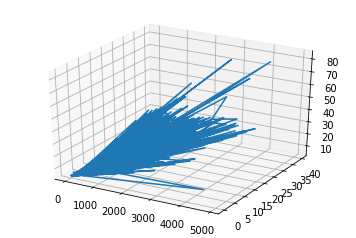

In [117]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(new_NWCab['trip_sec'], new_NWCab['trip_miles'], zs=new_NWCab['fare'])